In [24]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

In [37]:
crime_data <- read_csv('crimedata_csv_AllNeighbourhoods_AllYears.csv') %>%
    mutate(TYPE = as_factor(TYPE),
          NEIGHBOURHOOD = as_factor(NEIGHBOURHOOD)) %>%
    drop_na()
head(crime_data)

Rows: 868146 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Theft from Vehicle,2008,12,7,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2009,8,28,19,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2012,7,25,12,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2014,5,8,12,49,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2014,10,19,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2015,2,18,18,30,11XX E HASTINGS ST,Strathcona,494141.1,5458690


In [46]:
# select crime_data with only chosen neighborhood and type
crime_data_clean <- crime_data %>%
    drop_na() %>%
    select(TYPE, NEIGHBOURHOOD) %>%
    group_by(TYPE)


head(crime_data_clean)

crime_data_total <- crime_data_clean %>%
    summarise(total = n())
    

mount_pleasant_n <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == 'Mount Pleasant') %>%
    summarise(MountPleasent = n())

strathcona_n <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == 'Strathcona') %>%
    summarise(Strathcona = n())


crime_data_sum <- crime_data_total %>%
    inner_join(mount_pleasant_n, by = 'TYPE') %>%
    inner_join(strathcona_n, by = 'TYPE') %>%
    mutate(MountPleasent_prop = MountPleasent/total) %>%
    mutate(strathcona_prop = Strathcona/total) %>%
    mutate(prop_diff = MountPleasent_prop - strathcona_prop) %>%
    mutate(MountPleasent_mean = mean(MountPleasent))





TYPE,NEIGHBOURHOOD
<fct>,<fct>
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona


In [47]:
crime_data_total

TYPE,total
<fct>,<int>
Theft from Vehicle,240856
Theft of Bicycle,36930
Theft of Vehicle,44710
Vehicle Collision or Pedestrian Struck (with Fatality),347
Vehicle Collision or Pedestrian Struck (with Injury),28839
Break and Enter Commercial,47310
Break and Enter Residential/Other,72174
Homicide,309
Mischief,105195


In [48]:
crime_data_sum

TYPE,total,MountPleasent,Strathcona,MountPleasent_prop,strathcona_prop,prop_diff,MountPleasent_mean
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Theft from Vehicle,240856,13345,13161,0.05540655,0.05464261,0.0007639419,4971
Theft of Bicycle,36930,3955,1692,0.10709450,0.04581641,0.0612780937,4971
Theft of Vehicle,44710,3118,2250,0.06973831,0.05032431,0.0194140013,4971
Vehicle Collision or Pedestrian Struck (with Fatality),347,21,34,0.06051873,0.09798271,-0.0374639769,4971
Vehicle Collision or Pedestrian Struck (with Injury),28839,2124,1559,0.07365027,0.05405874,0.0195915254,4971
Break and Enter Commercial,47310,4122,3146,0.08712746,0.06649757,0.0206298880,4971
Break and Enter Residential/Other,72174,3872,2681,0.05364813,0.03714634,0.0165017873,4971
Homicide,309,19,32,0.06148867,0.10355987,-0.0420711974,4971
Mischief,105195,6102,8142,0.05800656,0.07739912,-0.0193925567,4971


In [49]:
summary(crime_data_clean)

                                TYPE                          NEIGHBOURHOOD   
 Theft from Vehicle               :240856   Central Business District:233260  
 Other Theft                      :215709   West End                 : 78052  
 Mischief                         :105195   Strathcona               : 55744  
 Offence Against a Person         : 75613   Mount Pleasant           : 54681  
 Break and Enter Residential/Other: 72174   Fairview                 : 53340  
 Break and Enter Commercial       : 47310   Grandview-Woodland       : 48805  
 (Other)                          :111135   (Other)                  :344110  

Warning message in `==.default`(NEIGHBOURHOOD, c("Strathcona", "Mount Pleasant")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(NEIGHBOURHOOD, c("Strathcona", "Mount Pleasant")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(NEIGHBOURHOOD, c("Strathcona", "Mount Pleasant")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(NEIGHBOURHOOD, c("Strathcona", "Mount Pleasant")):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multipl

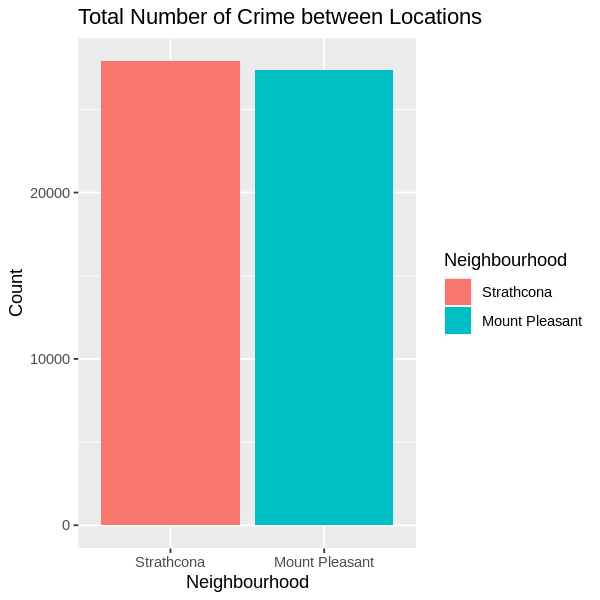

In [50]:
options(repr.plot.width = 5, repr.plot.height = 5)
pop <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == c('Strathcona', "Mount Pleasant" )) %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(n=n())

pop_plot <- pop %>%
    ggplot(aes(x=NEIGHBOURHOOD, y=n, fill = NEIGHBOURHOOD)) +
    geom_bar(stat = 'identity') +
    labs(x = "Neighbourhood",
       y = "Count", 
       fill = "Neighbourhood",
       title = "Total Number of Crime between Locations")
pop_plot

In [58]:
dataMP <- crime_data_clean |>
            filter(NEIGHBOURHOOD == "Mount Pleasent") |>
            group_by(TYPE) |>
            summarize(n= n())



dataS <- crime_data_clean |>
            filter(NEIGHBOURHOOD == "Strathcona") |>
            group_by(TYPE) |>
            summarize(n= n())

dataMP
dataS

TYPE,n
<fct>,<int>


TYPE,n
<fct>,<int>
Theft from Vehicle,13161
Theft of Bicycle,1692
Theft of Vehicle,2250
Vehicle Collision or Pedestrian Struck (with Fatality),34
Vehicle Collision or Pedestrian Struck (with Injury),1559
Break and Enter Commercial,3146
Break and Enter Residential/Other,2681
Homicide,32
Mischief,8142


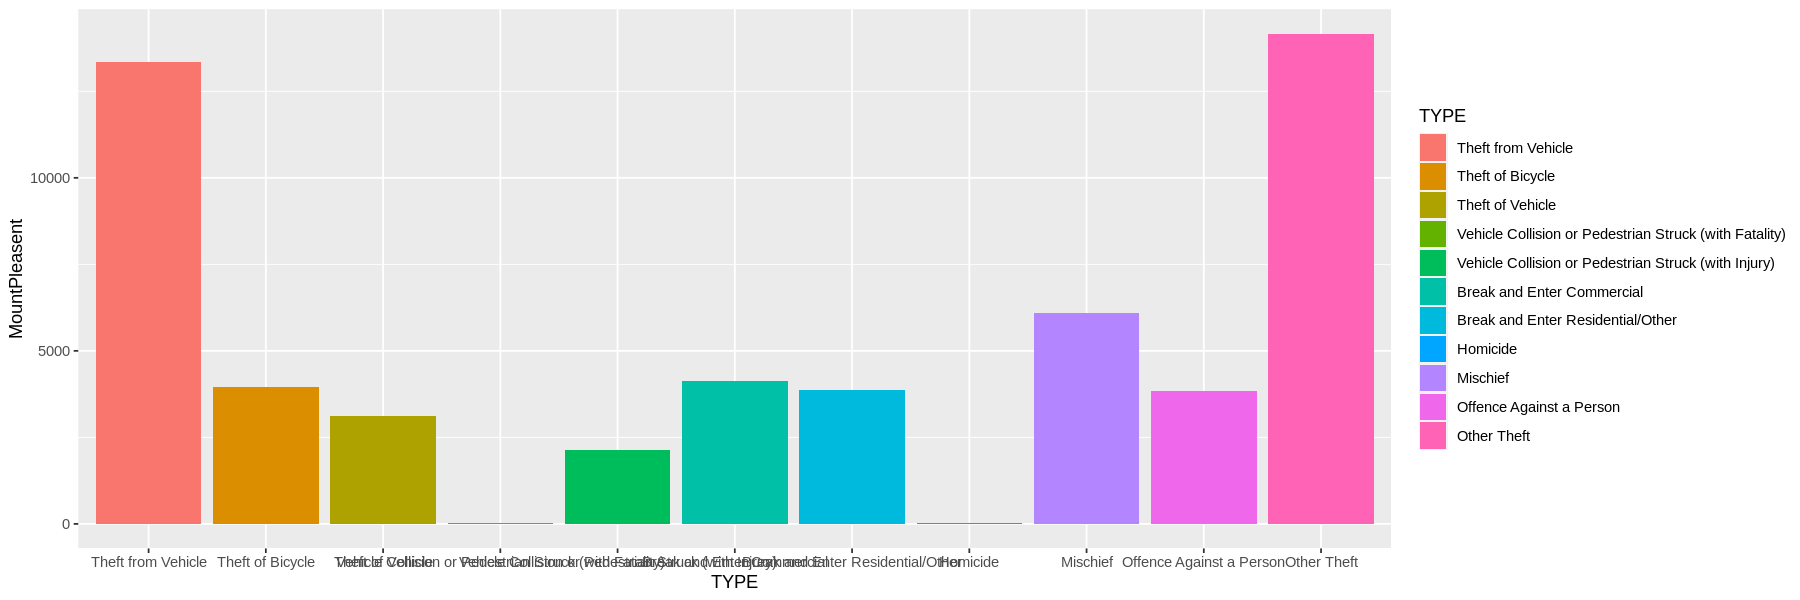

In [55]:
options(repr.plot.width = 15, repr.plot.height = 5)
westend_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y= MountPleasent, fill=TYPE)) +
    geom_bar(stat = 'identity')

westend_sum_plot

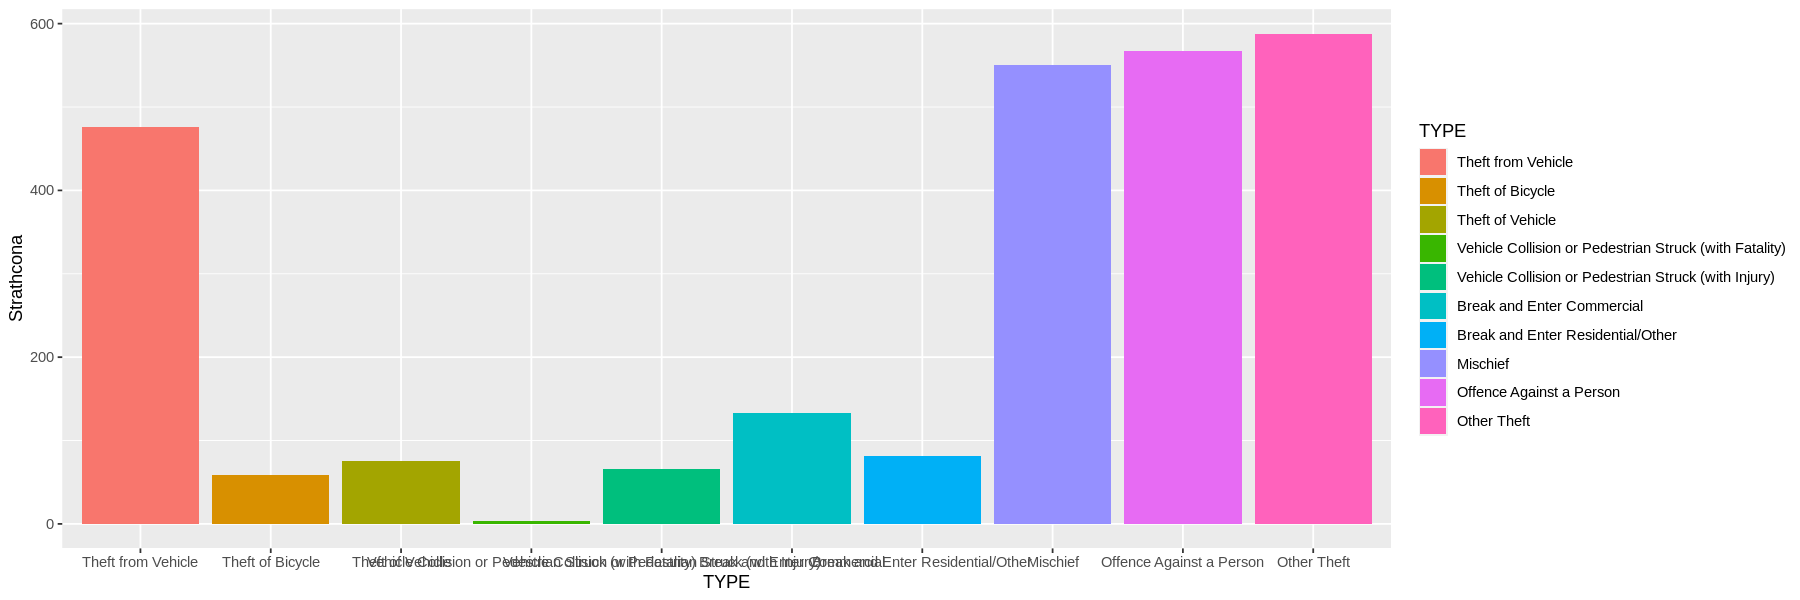

In [35]:
options(repr.plot.width = 15, repr.plot.height = 5)
westend_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y=Strathcona, fill=TYPE)) +
    geom_bar(stat = 'identity')

westend_sum_plot